# 📊 Credit Approval ML Pipeline
Este notebook realiza uma esteira completa de aprendizado de máquina com a base 'Credit Approval' do UCI, contendo todas as etapas necessárias para análise, transformação, modelagem e avaliação.

In [ ]:

# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Carregamento da base de dados diretamente da UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"
cols = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", 
        "A9", "A10", "A11", "A12", "A13", "A14", "A15", "Class"]
df = pd.read_csv(url, header=None, names=cols, na_values='?')

# Visualização das primeiras linhas
df.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [2]:

# Estatísticas descritivas para todas as colunas, incluindo categóricas
print("📊 Estatísticas descritivas:")
df.describe(include='all')


📊 Estatísticas descritivas:


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
count,678,678.000000,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677.000000,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,184.014771,1017.385507,NaN
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.806768,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,75.000000,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,276.000000,395.500000,NaN


In [3]:

# Transformação das colunas categóricas usando Label Encoding
# Isso é necessário para usar modelos que trabalham apenas com dados numéricos
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


In [4]:

# Remoção de linhas com mais de 30% de dados faltantes
df = df[df.isnull().mean(axis=1) < 0.3]

# Imputação dos valores ausentes restantes com a média da coluna
imputer = SimpleImputer(strategy='mean')
df[df.columns] = imputer.fit_transform(df)


In [5]:

# Separação entre atributos (X) e alvo (y)
X = df.drop("Class", axis=1)
y = df["Class"]

# Padronização dos dados para que todos fiquem na mesma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão em treino (60%), validação (20%) e teste (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 de 0.8

# Verificação dos tamanhos dos conjuntos
print(f"Treino: {X_train.shape}, Validação: {X_val.shape}, Teste: {X_test.shape}")


Treino: (414, 15), Validação: (138, 15), Teste: (138, 15)


In [6]:

# Treinamento do modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Avaliação no conjunto de validação
y_pred_val = model.predict(X_val)
acc_val = accuracy_score(y_val, y_pred_val)
print(f"Acurácia na validação: {acc_val:.2f}")


Acurácia na validação: 0.83


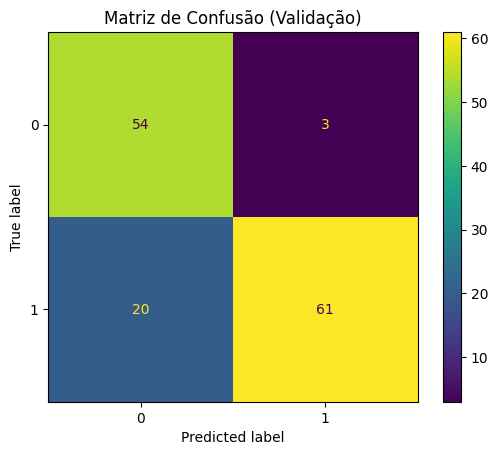

In [7]:

# Geração da matriz de confusão para validação
cm = confusion_matrix(y_val, y_pred_val)
ConfusionMatrixDisplay(cm).plot()
plt.title("Matriz de Confusão (Validação)")
plt.show()


In [8]:

# Avaliação final no conjunto de teste
y_pred_test = model.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print(f"Acurácia no teste final: {acc_test:.2f}")

# Predição de um exemplo individual
sample = X_test[0].reshape(1, -1)
prediction = model.predict(sample)[0]
print(f"Predição para uma nova amostra: {'Aprovado' if prediction == 1 else 'Rejeitado'}")


Acurácia no teste final: 0.85
Predição para uma nova amostra: Aprovado
